In [131]:
import torch
import torch.nn as nn
from torch.autograd import Variable

from torchvision import transforms
from torchvision import datasets
print(torch.cuda.is_available())
torch.backends.cudnn.benchmark = True
is_cuda = True

True


In [132]:
train_dataset = datasets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

In [133]:
len(train_dataset)

60000

In [134]:
train_dataset[0][1]

5

In [135]:
type(train_dataset)

torchvision.datasets.mnist.MNIST

In [136]:
type(train_dataset[0][0])

torch.Tensor

In [137]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [138]:
train_dataset[0][0].squeeze().shape

torch.Size([28, 28])

In [139]:
import matplotlib.pyplot as plt
import numpy as np

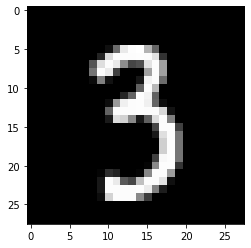

In [140]:
show_img = train_dataset[98][0].squeeze().numpy()
plt.imshow(show_img, cmap='gray')

In [141]:
test_dataset = datasets.MNIST(root = './data',
                              train = False,
                              transform=transforms.ToTensor(),
                              download = True)

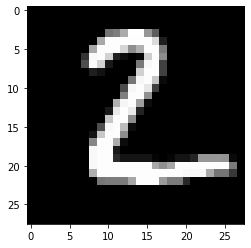

In [142]:
show_img = test_dataset[1][0].squeeze().numpy()
plt.imshow(show_img, cmap='gray')

In [143]:
test_dataset[100]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.4980, 0.8667, 0.2039, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.2510, 0.8980, 0.8588, 0.4078, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [144]:
batch_size = 100
n_iters = 6000
num_epochs = int(n_iters / (len(train_dataset) / batch_size))

In [145]:
import collections.abc as collections

In [146]:
isinstance(train_dataset, collections.Iterable)

False

In [147]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

In [148]:
isinstance(train_loader, collections.Iterable)

True

In [149]:
A = [1,2,3,4]
isinstance(A, collections.Iterable)

True

In [150]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=False)

In [151]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim12):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [152]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)
if is_cuda == True:
    model.cuda()

In [153]:
criterion = nn.CrossEntropyLoss()

In [154]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [155]:
print(len(list(model.parameters())))

print(list(model.parameters())[0].size())

2
torch.Size([10, 784])


In [156]:
for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
print(images.shape)

torch.Size([100, 784])


In [157]:
iter = 0

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        if is_cuda == True:
            images = Variable(images.view(-1, 28*28)).cuda()
            labels = Variable(labels).cuda()
        else :
            images = Variable(images.view(-1, 28*28))
            labels = Variable(labels)          
        
        optimizer.zero_grad()

        outputs = model(images)

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter +=1
        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                if is_cuda == True:
                    images = Variable(images.view(-1, 28*28)).cuda()
                else:
                    images = Variable(images.view(-1, 28*28))
                outputs = model(images)

                # Get predictions from the maximum value
                # torch.max(iter, 0): search for max along columns, torch.max(iter, 1): search max in rows
                _, predicted = torch.max(outputs.detach(), 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted.cpu() == labels.cpu()).sum()

            accuracy = 100 * int(correct) / total

            # Print loss
            print("Iteration: {}, loss: {}, Accuracy: {}".format(iter, loss, accuracy))

Iteration: 500, loss: 1.8834117650985718, Accuracy: 67
Iteration: 1000, loss: 1.5810518264770508, Accuracy: 75
Iteration: 1500, loss: 1.3187249898910522, Accuracy: 78
Iteration: 2000, loss: 1.2389453649520874, Accuracy: 80
Iteration: 2500, loss: 1.1363780498504639, Accuracy: 81
Iteration: 3000, loss: 1.0617494583129883, Accuracy: 82
Iteration: 3500, loss: 0.9956709146499634, Accuracy: 83
Iteration: 4000, loss: 0.8495159149169922, Accuracy: 83
Iteration: 4500, loss: 0.7709685564041138, Accuracy: 84
Iteration: 5000, loss: 0.7581937313079834, Accuracy: 84
Iteration: 5500, loss: 0.8134375214576721, Accuracy: 84
Iteration: 6000, loss: 0.6386802792549133, Accuracy: 85


In [166]:
a, b = torch.max(outputs.detach(), 1)

In [159]:
a = torch.randn(4, 4)
a

tensor([[ 0.1366,  0.6343,  0.0140, -0.2502],
        [ 0.2318, -0.4372, -0.2146, -0.0720],
        [-0.8906, -0.2768,  0.3267,  0.2719],
        [-0.6175,  0.0633,  1.2509,  0.0720]])

In [167]:
b

tensor([8, 9, 0, 1, 4, 7, 4, 8, 6, 7, 8, 0, 8, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4, 1,
        4, 2, 2, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 0, 6, 3, 8, 8, 9, 1, 4,
        0, 6, 1, 0, 0, 0, 0, 8, 1, 7, 7, 1, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 3, 2,
        4, 9, 4, 2, 6, 4, 1, 7, 2, 6, 6, 0, 1, 7, 8, 4, 5, 6, 7, 8, 4, 0, 1, 2,
        3, 4, 8, 6], device='cuda:0')

In [168]:
labels.cpu().cpu().cpu()

tensor([8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4, 1,
        9, 3, 8, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 6, 5, 3, 3, 3, 9, 1, 4,
        0, 6, 1, 0, 0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 5, 2,
        4, 9, 4, 3, 6, 4, 1, 7, 2, 6, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
        3, 4, 5, 6])

In [181]:
labels.size()[0]

100

In [163]:
predicted

tensor([8, 9, 0, 1, 4, 7, 4, 8, 6, 7, 8, 0, 8, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4, 1,
        4, 2, 2, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 0, 6, 3, 8, 8, 9, 1, 4,
        0, 6, 1, 0, 0, 0, 0, 8, 1, 7, 7, 1, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 3, 2,
        4, 9, 4, 2, 6, 4, 1, 7, 2, 6, 6, 0, 1, 7, 8, 4, 5, 6, 7, 8, 4, 0, 1, 2,
        3, 4, 8, 6], device='cuda:0')

In [164]:
num_epochs

10

In [165]:
6000/600

10.0